![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 5: Support Vector Machines

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (09-01-2020)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/Session_5_Classical_Data_Analysis_SVM.ipynb)

**Resources (code patched and updated from):**
* MNIST
* Sklearn
* Aurelien Geron's O'Reilly's "Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"
* Lazy Programmer Lecture Series
* Andrew Ng Lectures

# SVM gentle introduction


## SVM - Image Clasification
The UUID is **#S5C1**. You can use it to refer to the slides in Session 5. 

### Load and prepare data

In [0]:
# SVM is used within sklearn as Support Vector Classifier
from sklearn.svm import SVC
from datetime import datetime

In [0]:
# Let's import MNIST directly from keras
from keras.datasets import mnist

# Load data using keras mnist utils
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Exploring the dataset
print(train_X.shape, train_Y.shape)

(60000, 28, 28) (60000,)


Text(0.5, 1.0, ' Digit 5')

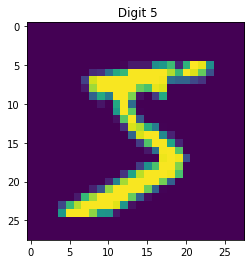

In [0]:
# Exploring the dataset visually
import matplotlib.pyplot as plt

plt.imshow(train_X[0])
plt.title(" Digit " + str(train_Y[0]) )

In [0]:
# Checking the value range over the dataset

# Check values for row 6, column 6
train_X[6][6]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 175,
       253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [0]:
# Let's normalize the input so that SVM can perform better

# First we need to flatten the images. We can use numpy reshape for that
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

import numpy as np
type(train_X)

# Find size of one-dimensional vector for each image. Yes, it is 784
num_pixels = train_X.shape[1] * train_X.shape[2] # find size of one-dimensional vector
print(num_pixels)

784


In [0]:
# Now, let's flatten Train and Test images using numpy reshape
train_X_reshaped = train_X.reshape(train_X.shape[0], num_pixels).astype('float32') 
test_X_reshaped = test_X.reshape(test_X.shape[0], num_pixels).astype('float32') 

print(train_X_reshaped.shape, test_X_reshaped.shape)

(60000, 784) (10000, 784)


In [0]:
# Now let's normalize the values from (0..255) to (0..1)

train_X_normalized = train_X_reshaped / 255
test_X_normalized = test_X_reshaped / 255

In [0]:
# Now let's test the values of array
train_X_normalized[0][100:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
       0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Alternative: mean=0, variance=1

In [0]:
# Let's apply sklearns mean=0, variance=1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X_meanvar = scaler.fit_transform(train_X_reshaped)
test_X_meanvar = scaler.transform(test_X_reshaped)

In [0]:
# Now let's test the values of array
train_X_meanvar[0][100:300]

array([-2.62596905e-01, -2.47855902e-01, -2.21947014e-01, -1.87211409e-01,
       -1.47640124e-01, -1.08164363e-01, -7.68121183e-02, -4.70752977e-02,
       -3.02019659e-02, -1.52412439e-02, -5.28371939e-03,  0.00000000e+00,
        0.00000000e+00, -4.08251677e-03, -7.76342256e-03, -1.48932543e-02,
       -2.39627510e-02, -5.03408983e-02, -7.87674636e-02, -1.16181545e-01,
       -1.61247566e-01, -2.11961627e-01, -2.66898721e-01, -3.25678021e-01,
       -3.90241563e-01, -4.52076375e-01, -4.99397993e-01, -5.23428321e-01,
       -5.17618895e-01, -4.80902404e-01, -4.23079699e-01, -3.56740385e-01,
       -2.83683658e-01, -2.16836661e-01, -1.58524379e-01, -1.08784594e-01,
       -7.09225312e-02, -3.89534794e-02, -1.42523851e-02, -5.77049796e-03,
        0.00000000e+00,  0.00000000e+00, -1.19017400e-02, -2.20501553e-02,
       -5.18380739e-02, -9.06597003e-02, -1.39667109e-01, -1.97082117e-01,
       -2.64384717e-01, -3.40730429e-01, -4.22535747e-01, -5.15408635e-01,
       -5.84660351e-01, -

### Fit the SVC

**Be careful!** Train duration on Google Colab: 0:16:05.266673 !!!

In [0]:
# Call the SVC model
model = SVC()

In [0]:
t0 = datetime.now()
model.fit(train_X_normalized, train_Y)
print("Train duration:", datetime.now()-t0)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train duration: 0:16:05.266673


### Evaluate the SVC

**Be careful!** Train score on Google Colab: 

*   Train score duration on Google Colab:  0:27:02.376792 !!
*   Test score duration on Google Colab:  0:04:25.458038 !!


In [0]:
# The model score returns the accuracy
t0 = datetime.now()
print("Train score:", model.score(train_X_normalized, train_Y), "duration: ", datetime.now()-t0)

Train score: 0.943 duration:  0:27:02.376792


In [0]:
# The model score returns the accuracy
t0 = datetime.now()
print("Test score:", model.score(test_X_normalized, test_Y), "duration: ", datetime.now()-t0)

Test score: 0.9446 duration:  0:04:25.458038


## SVM - Spam classifier

The UUID is **#S5C2**. You can use it to refer to the slides in Session 5. 

### Load the data

In [2]:
# The dataset in the course repo is directly downloaded from Kaggle

!wget "https://github.com/vfp1/bts-mbds-classical-data-analysis-2019/raw/master/spam.csv"

--2020-01-02 13:39:48--  https://github.com/vfp1/bts-mbds-classical-data-analysis-2019/raw/master/spam.csv
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-classical-data-analysis-2019/master/spam.csv [following]
--2020-01-02 13:39:49--  https://raw.githubusercontent.com/vfp1/bts-mbds-classical-data-analysis-2019/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2020-01-02 13:39:49 (22.7 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [0]:
import pandas as pd
"""
We need to define a particular encoding, because the original file contain invalid characters.
So depending on your Pandas, an error can be thrown such as:

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte

Usually, when working with text, you will find this issues scattered around. Since nowadays we 
tend to use emojis, symbols and other stuff which is not recognized by utf-8
"""
df_spam = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Let's drop the columns that are not useful

df_spam = df_spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Let's also rename the columns so we have something better than "v1" and "v2"

df_spam.columns = ['labels', 'data']
df_spam.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data preprocessing

In [7]:
# Let's create a column for binary labels 
df_spam['binary_labels'] = df_spam['labels'].map({'ham':0, 'spam':1})
df_spam.head()

,labels,data,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# Let's create our "Y" matrix by extracting our numpy array

"""
We really don't need to do this, as Sklearn accepts strings and series as labels.
In any case, it is good practice to do this, as we have a numerical representation
of the data in case that we want to build our own model.
"""

Y = df_spam['binary_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [0]:
# Now let's create our "X" matrix, our input features for every sample

"""
Here we can use different approaches for our input matrix, whether that is TF-IDF
or CountVectorizer which does basically raw counts.

Here is the TF-IDF version

We need to use the decode error to ignore invalid utf-8 characters
"""
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(decode_error='ignore')
X_tfidf = tfidf.fit_transform(df_spam['data'])

In [0]:
"""
Here we can use different approaches for our input matrix, whether that is TF-IDF
or CountVectorizer which does basically raw counts.

Here is the CountVectorizer version

We need to use the decode error to ignore invalid utf-8 characters
"""

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(decode_error='ignore')
X_rawcount = count_vectorizer.fit_transform(df_spam['data'])

In [0]:
# Let's create the datasets 
from sklearn.model_selection import train_test_split

Xtrain_tfidf, Xtest_tfidf, Ytrain_tfidf, Ytest_tfidf = train_test_split(X_tfidf, Y, test_size=0.2)
Xtrain_rawcount, Xtest_rawcount, Ytrain_rawcount, Ytest_rawcount = train_test_split(X_rawcount, Y, test_size=0.2)

In [12]:
Xtrain_tfidf.shape

(4457, 8672)

In [0]:
#tfidf.get_feature_names()

### Visualize the dataset

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Let's create a function to visualize our data in a word cloud

# We create our function that asks for a label
def visualize(label):

    # We initialize a "words" string
    words = ''

    # Loop through the DF, pass every message ('data') that has the same label noted in the string above
    for msg in df_spam[df_spam['labels'] == label]['data']:
        
        # Convert the message to lowercase
        msg = msg.lower()
        
        # Append the message to the words string and add a space
        words += msg + ' '

    # Generate a WordCloud with all the looped words
    wordcloud = WordCloud(width=600, height=400).generate(words)

    # Show the wordcloud with plt.imshow
    plt.imshow(wordcloud)

    # Take the axis off
    plt.axis('off')

    # Set a title with the label
    plt.title(label)

    # Show the image
    plt.show()


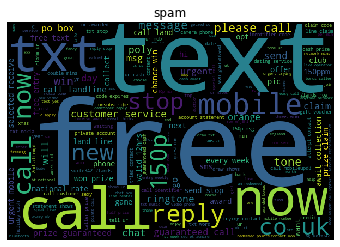

In [15]:
visualize('spam')

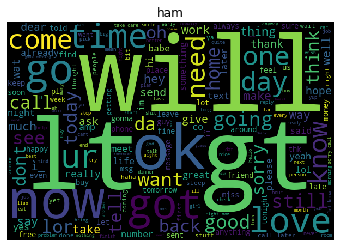

In [16]:
visualize('ham')

### Fit the SVC for TF-IDF

In [0]:
# Let's fit the SVC model
from sklearn.svm import SVC

# We will see what C stands for in next examples
model_tfidf = SVC(kernel='linear', C=2.)

In [18]:
"""
This time training the SVM is way faster, because we have less data. And it is also
just vectorized strings
"""

from datetime import datetime

t0 = datetime.now()
model_tfidf.fit(Xtrain_tfidf, Ytrain_tfidf)
print("train duration:", datetime.now() - t0)

train duration: 0:00:00.819911


### Evaluate the SVC for TF-IDF


In [19]:
t0 = datetime.now()
print("train score:", model_tfidf.score(Xtrain_tfidf, Ytrain_tfidf), "duration:", datetime.now() - t0)

train score: 0.9995512676688355 duration: 0:00:00.714181


In [20]:
t0 = datetime.now()
print("test score:", model_tfidf.score(Xtest_tfidf, Ytest_tfidf), "duration:", datetime.now() - t0)

test score: 0.9865470852017937 duration: 0:00:00.179232


### Fit the SVC for Raw Count

In [0]:
# Let's fit the SVC model
from sklearn.svm import SVC

# We will see what C stands for in next examples
model_rawcount = SVC(kernel='linear', C=2.)

In [22]:
"""
This time training the SVM is way faster, because we have less data. And it is also
just vectorized strings
"""

from datetime import datetime

t0 = datetime.now()
model_rawcount.fit(Xtrain_rawcount, Ytrain_rawcount)
print("train duration:", datetime.now() - t0)

train duration: 0:00:00.559412


### Evaluate the SVC for Raw Count

In [23]:
t0 = datetime.now()
print("train score:", model_rawcount.score(Xtrain_rawcount, Ytrain_rawcount), "duration:", datetime.now() - t0)

train score: 1.0 duration: 0:00:00.461344


In [24]:
t0 = datetime.now()
print("test score:", model_rawcount.score(Xtest_rawcount, Ytest_rawcount), "duration:", datetime.now() - t0)

test score: 0.9856502242152466 duration: 0:00:00.119815


### Predictions

We can dive a little bit deeper in that accuracy and see what is going on

In [25]:
# We are getting close to 100% accuracy in TF-IDF, but let's see what is wrong with our model
df_spam['predictions'] = model_tfidf.predict(X_tfidf)
df_spam.head()

,labels,data,binary_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [26]:
# Let's look at things that should be spam
print("*** things that should be spam ***")

# We filter the dataframe with elementwise AND operation to check when pred=0 but labels=1
sneaky_spam = df_spam[(df_spam['predictions'] == 0) & (df_spam['binary_labels'] == 1)]['data']

# We loop through each message in sneaky_spam and check messages that should have been spam (FALSE NEGATIVES)
for msg in sneaky_spam:
  print(msg)

*** things that should be spam ***
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
08714712388 between 10am-7pm Cost 10p
Romantic Paris. 2 nights, 2 flights from å£79 Book now 4 next year. Call 08704439680Ts&Cs apply.
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be your friend 1/1
Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?
Burger King - Wanna play footy at a top stadium? Get 2 Burger King before 1

In [27]:
# Let's look at things that should be spam
print("*** things that should be spam ***")

# We filter the dataframe with elementwise AND operation to check when pred=1 but labels=0
sneaky_spam = df_spam[(df_spam['predictions'] == 1) & (df_spam['binary_labels'] == 0)]['data']

# We loop through each message in sneaky_spam and check messages that should have been spam (FALSE POSITIVES)
for msg in sneaky_spam:
  print(msg)

*** things that should be spam ***


### Let's plot PR curves, we need to update sklern to version 0.22

In [28]:
import sklearn
sklearn.__version__

'0.22'

In [84]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.0MB 8.9MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [85]:
# In Google Colab, we need to restart the kernel in order for this to take effect
import sklearn
sklearn.__version__

'0.21.3'

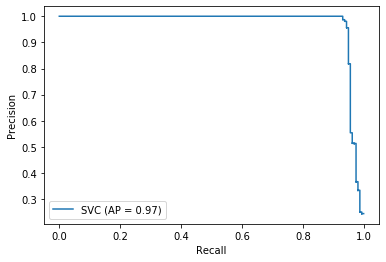

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model_tfidf, Xtest_tfidf, Ytest_tfidf)


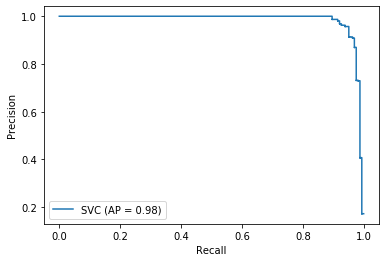

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model_rawcount, Xtest_rawcount, Ytest_rawcount)

## SVM - Medical diagnosis

The UUID is **#S5C3**. You can use it to refer to the slides in Session 5.

### Load the data

In [0]:
from sklearn.datasets import load_breast_cancer

# Load the brest cancer dataset
data = load_breast_cancer()

In [2]:
# As stated, we get 569 instances and 30 features or attributes
data.data.shape

(569, 30)

In [4]:
# The description of the dataset is associated with it
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### Data preprocessing

In [0]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.3)

In [0]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler scales real value variables

"""
The standarization is done by removing the mean and scaling to unit variance.

The standardized score of a sample "X" is calculated as:

z = (x - u)/s

    * u : the mean of the training samples
    * s : standard deviation
"""
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Fit the SVC - linear kernel

Check the slides related with **#S5C3** for more information on kernel functions


In [13]:
"""
Even if we are not experts at breast cancer detection, the beauty of machine learning
is that we can extract information from the data even if we are not doctors. 
It doens't matter what the data is, it does not affect how the algorithm works.
"""
from sklearn.svm import SVC

model = SVC(kernel='linear')
# model = SVC()
model.fit(Xtrain, Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Evaluate the SVC - linear kernel

In [14]:
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.992462311557789
test score: 0.9649122807017544


### Fit the SVC - default RBF kernel

Check the slides related with **#S5C3** for more information on kernel functions


In [15]:
"""
Even if we are not experts at breast cancer detection, the beauty of machine learning
is that we can extract information from the data even if we are not doctors. 
It doens't matter what the data is, it does not affect how the algorithm works.
"""
from sklearn.svm import SVC

model = SVC(kernel='rbf')
# model = SVC()
model.fit(Xtrain, Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Evaluate the SVC - default RBF kernel

In [16]:
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.992462311557789
test score: 0.9590643274853801


### Conclusion

A linear model is good enough so a non-linear model is not needed. As a reminder, just because you can use a more expressive model (non-linear) you don't need to use it. Sometimes, linear models are good enough generalizers and faster to train.

## SVM - Concrete regression

The UUID is **#S5C4**. You can use it to refer to the slides in Session 5.

### Download and load the data

In [17]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

--2020-01-02 22:38:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124928 (122K) [application/x-httpd-php]
Saving to: ‘Concrete_Data.xls’

Concrete_Data.xls   100%[===================>] 122.00K   290KB/s    in 0.4s    

2020-01-02 22:38:26 (290 KB/s) - ‘Concrete_Data.xls’ saved [124928/124928]



In [20]:
import pandas as pd

df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Preprocess the data

In [21]:
# We take out those crazy titles and pass the number of each column
df.columns = list(range(df.shape[1]))
df.head()

,0,1,2,3,4,5,6,7,8
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [0]:
# We load the column values as numpy array
# Column 8 is the compressive strenght, the target
X = df[[0,1,2,3,4,5,6,7]].values
Y = df[8].values

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)
Ytest.shape

(340,)

We standardize both input and target

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [36]:
# For the target, this will through an error because expects 2D array and target is 1D
target_scaler = StandardScaler()
Ytrain = target_scaler.fit_transform(Ytrain)
Ytest = target_scaler.transform(Ytest)
Ytest.shape

ValueError: ignored

In [35]:
# This is the correct way to do it
target_scaler = StandardScaler()
Ytrain = target_scaler.fit_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest = target_scaler.transform(Ytest.reshape(-1, 1)).flatten()
Ytest.shape

(340,)

We use here the **SVR** which is the SVM that Sklearn uses for regression. We will use different kernels and see how **rbf** is actually the best one that we can apply

In [27]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.6000479119873936
test score: 0.5585458482342415


In [28]:
from sklearn.svm import SVR

model = SVR(kernel='poly')
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.7631552986675967
test score: 0.6744729401504626


In [30]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.8911243254969827
test score: 0.8197193583687006


# SVM Theory

##  Setup

Following Aurelien Geron's suggestion, let's set up the working environment in our notebook.

In [16]:
# Python ≥3.5 is required
# Let's assert that that is the case
import sys
assert sys.version_info >= (3, 5)

print(sys.version)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [17]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(sklearn.__version__)

0.21.3


In [0]:
# Common imports
import numpy as np
import os

In [0]:
# This will make this notebook's output stable across runs
np.random.seed(42)

In [0]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# Where to save the figures (adjust this to your convenience)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [0]:
# A function to save our figures

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear SVM - Large Margin Classification

The UUID is **#S5C5**. You can use it to refer to the slides in Session 5.

This code reproduces the images from the slides.


### Data preparation

In [24]:
# Import SVC and datasets from sklearn
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Load the iris dataset
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [0]:
# Choose the data we need to work with
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

"""
The pipe argument "|" is a bitwise OR of integers, meaning that it will be true
when y==0 and y==1. This creates a boolean matrix with the values to index for 
X and y
"""
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [26]:
# SVM Classifier model
# The kernel is set to linear and C to inf
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Fake linear regressors and SVMs

The UUID is **#S5C5**. You can use it to refer to the slides in Session 5.

This code reproduces the images from the slides.

This code reproduces the fake linear regressors explored in the slides as well as the Linear SVM

In [0]:
# Generation of bad models
# Generation of x data with linspace (evenly spaced numbers over start, stop, number of numbers)
x0 = np.linspace(0, 5.5, 200)
# Y=5*x0 -20
pred_1 = 5*x0 - 20
# Y=1*x0 -1.8
pred_2 = x0 - 1.8
# Y=0.1*x0 + 0.5
pred_3 = 0.1 * x0 + 0.5

In [28]:
svm_clf.coef_[0]

array([1.29411744, 0.82352928])

In [0]:
import matplotlib.pyplot as plt

# Generation of function to plot SVM decision boundaries
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Take the weights from the SVM fitted above
    w = svm_clf.coef_[0]
    # Take the bias from the SVM fitted above
    b = svm_clf.intercept_[0]

    """
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    """
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # This is half margin, the lenght of full margin is 2/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Plot the support vectors
    svs = svm_clf.support_vectors_
    # Plot the scatter support vectors
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    # Plot the decision boundary, upper and lower gutter
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

Saving figure large_margin_classification_plot


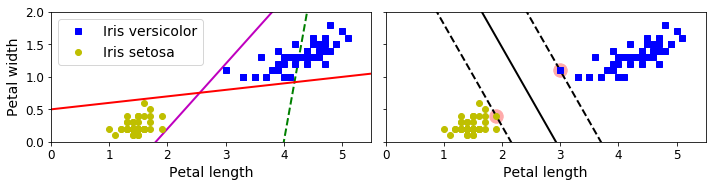

In [30]:
# Generation of plots

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

## Sensitivity to feature scales

The UUID is **#S5C6**. You can use it to refer to the slides in Session 5.

Here we show that the scale it is extremely important for SVMs

### Create some fake data

In [0]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

### Fit the SVM without scaling the data

We tweak the "C" parameter, we will see soon for what we use it.

In [32]:
svm_clf_unscaled = SVC(kernel="linear", C=100)
svm_clf_unscaled.fit(Xs, ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Fit the SVM scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

svm_clf_scaled = SVC(kernel="linear", C=100)
svm_clf_scaled.fit(X_scaled, ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Plotting the results

Saving figure sensitivity_to_feature_scales_plot


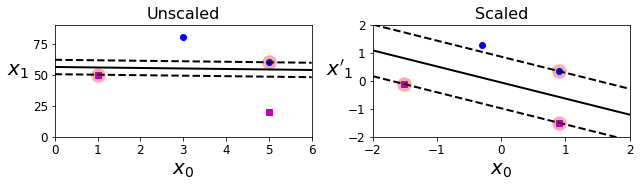

In [34]:
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_unscaled, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

## Soft margin classification - outlier detection
The UUID is **#S5C7**. You can use it to refer to the slides in Session 5.

Saving figure sensitivity_to_outliers_plot


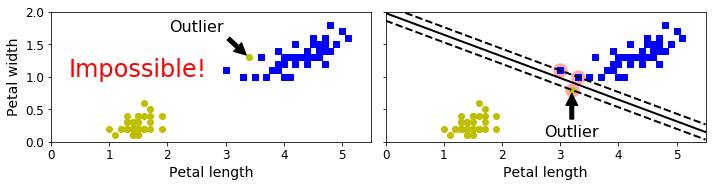

In [35]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

## Outliers and hyperparameter C

The UUID is **#S5C8**. You can use it to refer to the slides in Session 5.


This is the first code example in chapter 5:

In [36]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [37]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:

In [38]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [0]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


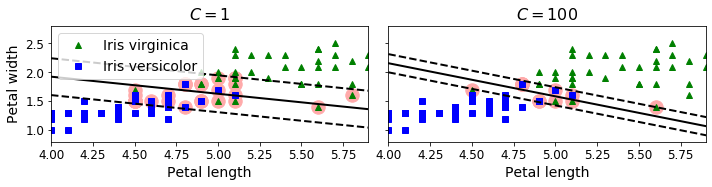

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

## Non-linear classification



### Polynomial expansion

The UUID is **#S5C9**. You can use it to refer to the slides in Session 5.

Saving figure higher_dimensions_plot


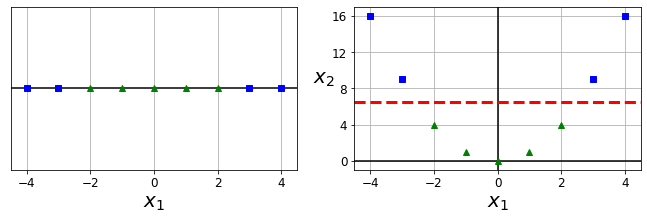

In [41]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

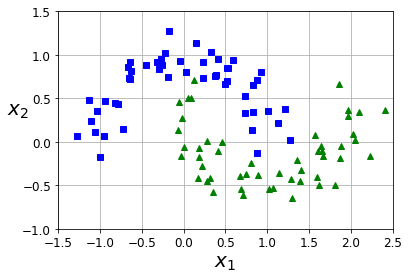

In [42]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [43]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

Saving figure moons_polynomial_svc_plot


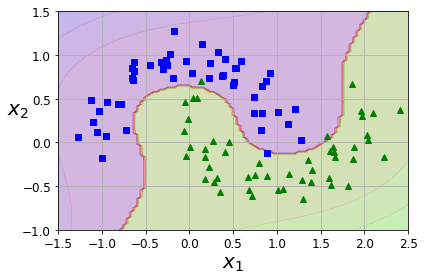

In [44]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

### Kernel trick

The UUID is **#S5C10**. You can use it to refer to the slides in Session 5.

In [46]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [47]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Saving figure moons_kernelized_polynomial_svc_plot


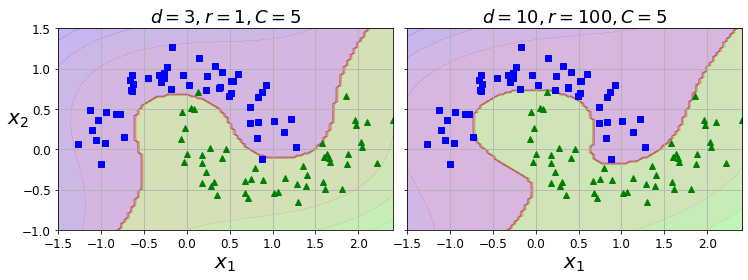

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Regression with SVMs

The UUID is **#S5C11**. You can use it to refer to the slides in Session 5.


In [0]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [50]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [0]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Saving figure svm_regression_plot


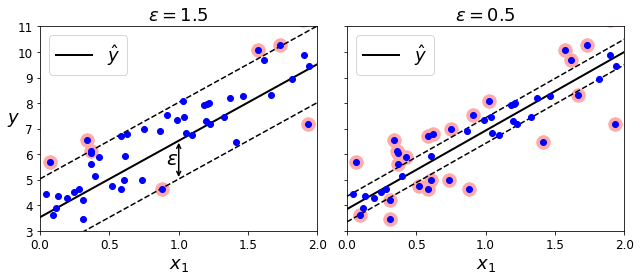

In [52]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

In [0]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

**Note**: to be future-proof, we set `gamma="scale"`, as this will be the default value in Scikit-Learn 0.22.

In [54]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Saving figure svm_with_polynomial_kernel_plot


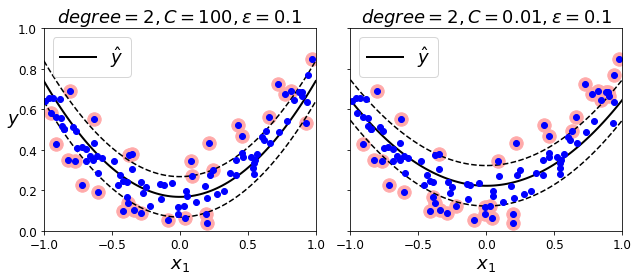

In [56]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()